<a href="https://colab.research.google.com/github/ysg1202/scikit_learn/blob/main/classification_nearest_neighbors_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problem description
- 목적: 꽃방침 (Sepal)과 꽃잎(Petal)의 너비와 길이를 입력으로 붓꽃 (iris) 품종을 분류
- K-nearest neighbors classifier (sklearn.neighbors)
 - 지도 학습과 비지도 학습에 모두 사용 가능한 학습 알고리즘
 - 지도 학습의 경우, 분류 (classification) 문제와 회귀 (regression) 문제에 모두 활용 가능
 - 분류 문제의 경우, 각 샘플의 class는 그와 인접한 k개의 샘플들의 class를 고려하여 추론됨 (파라미터:
 - 회귀 문제의 경우, 각 샘플로부터 수치 데이터를 예측 (인접한 k개 샘플들의 출력값의 평균으로 계산)

# 2. Data loading

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris(as_frame=True)
print(iris)
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

{'data':      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns], 'target': 0      0
1      0
2 

In [ ]:
print(X_train)

     sepal length (cm)  sepal width (cm)
60                 5.0               2.0
1                  4.9               3.0
8                  4.4               2.9
93                 5.0               2.3
106                4.9               2.5
..                 ...               ...
66                 5.6               3.0
29                 4.7               3.2
130                7.4               2.8
141                6.9               3.1
111                6.4               2.7

[112 rows x 2 columns]


In [ ]:
print(y_train)

60     1
1      0
8      0
93     1
106    2
      ..
66     1
29     0
130    2
141    2
111    2
Name: target, Length: 112, dtype: int64


# 3. K-nearest neighbors classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

clf = Pipeline(
    steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))]
)

# 4. Decision boundary
- weights parameter: 'uniform' or 'distance'
 - uniform: 샘플 데이터에 대한 예측값 결정 시, 모든 k개의 인접한 샘플들이 ('neighbors') 동일한 영향을 미침
 - distance: 샘플 데이터에 대한 예측값 결정 시, k개의 인접 샘플들 중 가까운 것이 더 큰 영향을 미침

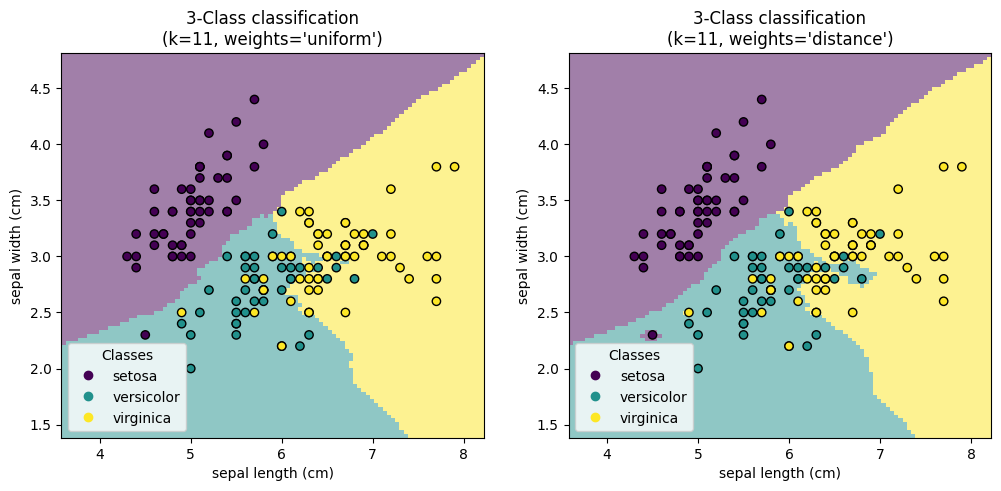

In [ ]:
import matplotlib.pyplot as plt

from sklearn.inspection import DecisionBoundaryDisplay

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()


🔎 Weights = uniform
Accuracy: 0.7105
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.58      0.54      0.56        13
   virginica       0.54      0.58      0.56        12

    accuracy                           0.71        38
   macro avg       0.71      0.71      0.71        38
weighted avg       0.71      0.71      0.71        38


🔎 Weights = distance
Accuracy: 0.6316
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.47      0.54      0.50        13
   virginica       0.40      0.33      0.36        12

    accuracy                           0.63        38
   macro avg       0.62      0.62      0.62        38
weighted avg       0.63      0.63      0.63        38



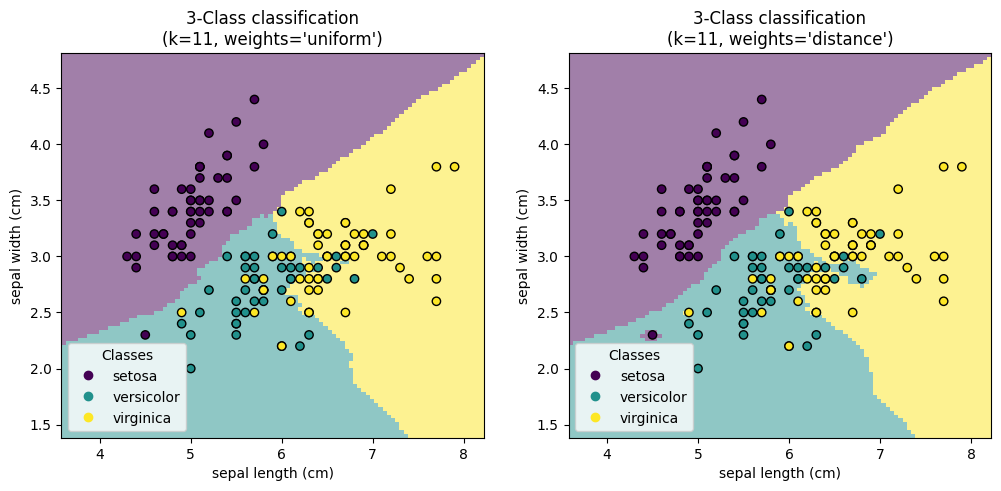

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score, classification_report

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # 💡 분류 성능 출력
    print(f"\n🔎 Weights = {weights}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred, target_names=iris.target_names))

    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()